<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%20Mandiri%205/Praktikum_Mandiri_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Praktikum ML/Praktikum Mandiri/data'
df = pd.read_csv(path + '/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Preprocessing
df.isnull().sum()


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Encoding data
species_map = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

df['Species'] = df['Species'].map(species_map)

In [ ]:
# Hapus Kolom id, pisahkan fitur dan target
df_data = df.drop(columns=['Id'])
X = df_data.drop(columns=['Species'])
y = df_data['Species']



In [ ]:
# Spliting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Membuat model decision tree
dt = DecisionTreeClassifier(random_state=42,
                            criterion='gini',
                            max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Evaluasi model decision tree
y_pred = dt.predict(X_test)
print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=species_map)}")


Akurasi: 93.33 %
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



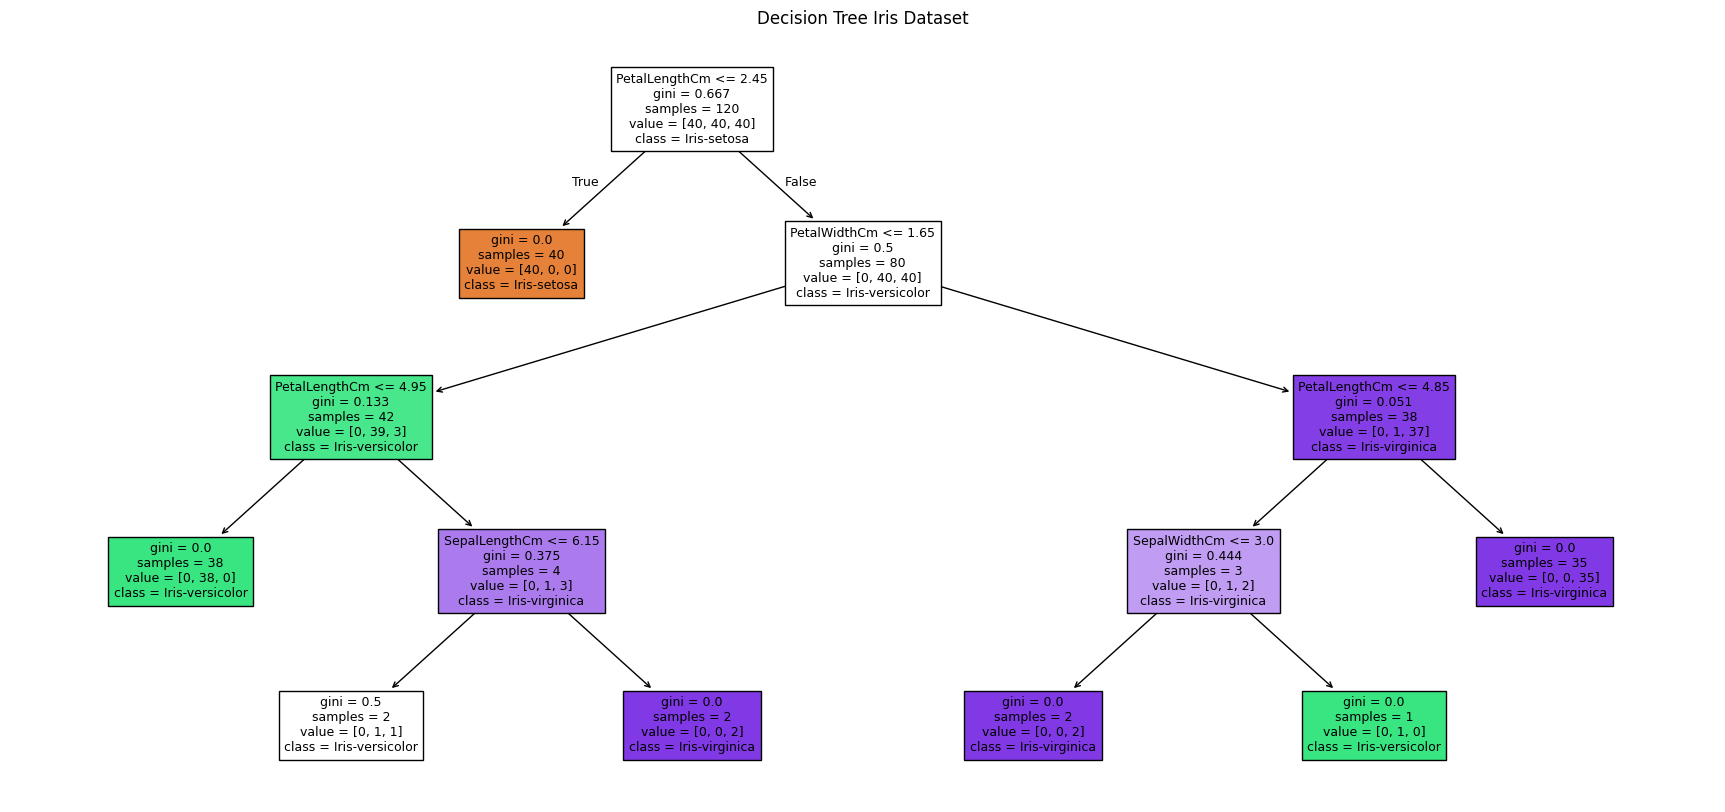

In [ ]:
# Visualisasi Decision tree
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names= X.columns,
    class_names= ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True,
    fontsize=9
)
plt.title("Decision Tree Iris Dataset")
plt.show()

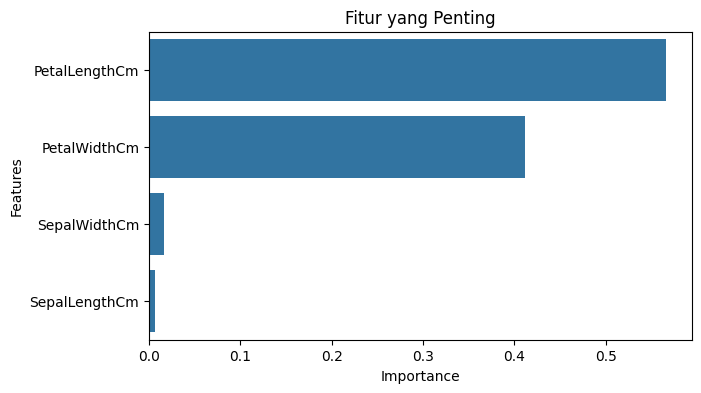

,0
PetalLengthCm,0.565639
PetalWidthCm,0.411154
SepalWidthCm,0.016878
SepalLengthCm,0.006329


In [ ]:
# Fitur yang Penting
imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Fitur yang Penting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
imp

In [ ]:
# Hyperparameter
scores = {}
for i in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=i, random_state=42)
    m.fit(X_train, y_train)
    scores[i] = accuracy_score(y_test, m.predict(X_test))

scores
best_i = max(scores, key=scores.get)
print("Best max_depth:", {best_i}, "|Acc:", round(scores[best_i]*100, 2), "%")

Best max_depth: {3} |Acc: 96.67 %
